In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
print(path_to_zip)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')
print(PATH)

68606236/68606236 [==============================] - 8s 0us/step
C:\Users\GSENR\.keras\datasets\cats_and_dogs.zip
C:\Users\GSENR\.keras\datasets\cats_and_dogs_filtered


In [4]:
train_dir = os.path.join(PATH, 'train')            # 학습용
validation_dir = os.path.join(PATH, 'validation')  # 평가용
print(train_dir)
print(validation_dir)

C:\Users\GSENR\.keras\datasets\cats_and_dogs_filtered\train
C:\Users\GSENR\.keras\datasets\cats_and_dogs_filtered\validation


In [5]:
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures

print("개 : ", train_dogs_dir)
print("고양이 : ", train_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures

print("개 : ", validation_dogs_dir)
print("고양이 : ", validation_cats_dir)

개 :  C:\Users\GSENR\.keras\datasets\cats_and_dogs_filtered\train\dogs
고양이 :  C:\Users\GSENR\.keras\datasets\cats_and_dogs_filtered\train\cats
개 :  C:\Users\GSENR\.keras\datasets\cats_and_dogs_filtered\validation\dogs
고양이 :  C:\Users\GSENR\.keras\datasets\cats_and_dogs_filtered\validation\cats


In [6]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [7]:
## 이미지 개수
print('Total training cat images:', num_cats_tr)  # 고양이
print('Total training dog images:', num_dogs_tr)  # 개
print("--")

print('Total validation cat images:', num_cats_val)  # 고양이
print('Total validation dog images:', num_dogs_val)  # 개
print("--")

print("Total training images:", total_train)  #  학습용 = 개 + 고양이
print("Total validation images:", total_val)  #  평가용 = 개 + 고양이

Total training cat images: 1000
Total training dog images: 1000
--
Total validation cat images: 500
Total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [8]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [9]:
train_image_generator = ImageDataGenerator(rescale=1./255)      # 학습용 데이터 생성기
validation_image_generator = ImageDataGenerator(rescale=1./255) # 평가용 데이터 생성기

In [10]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary', 
                                                           seed=42)

Found 2000 images belonging to 2 classes.


In [11]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                   directory=validation_dir,
                                                   target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                   class_mode='binary', 
                                                   seed=42)

Found 1000 images belonging to 2 classes.


In [12]:
sample_training_images, _ = next(train_data_gen)
sample_training_images.shape  # 이미지 추출

(128, 150, 150, 3)

In [13]:
# 이 함수는 이미지를 plot를 하는 함수.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

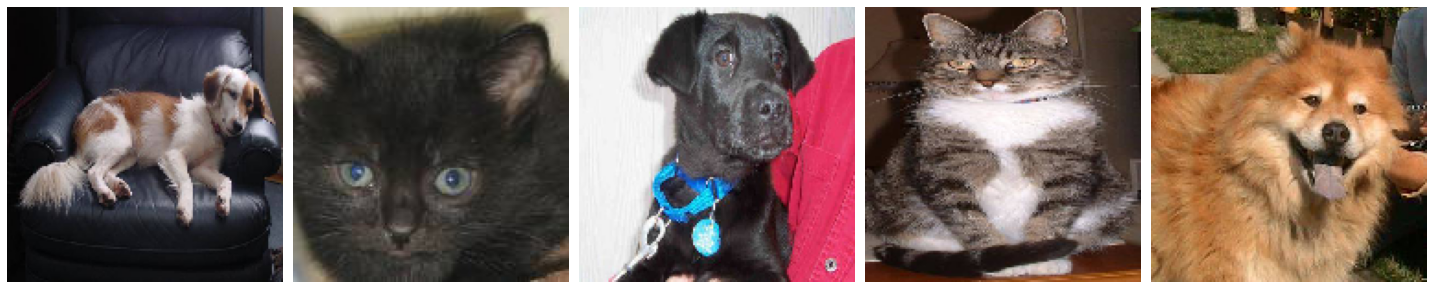

In [14]:
plotImages(sample_training_images[:5])

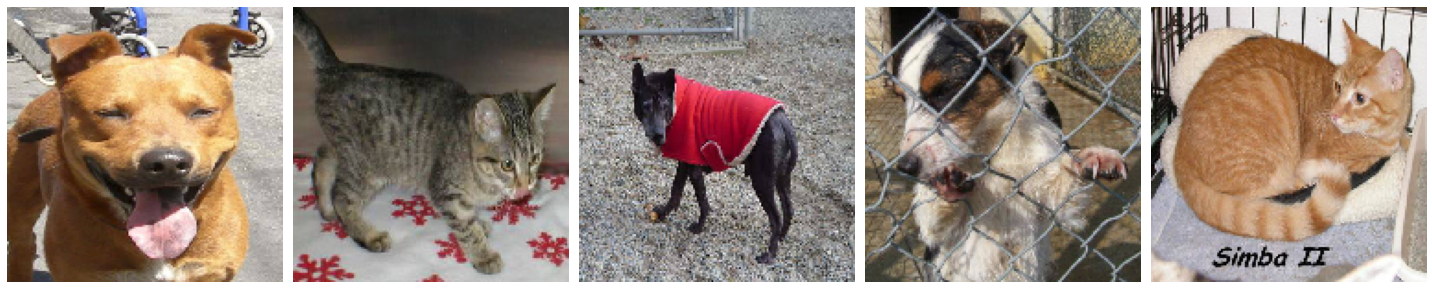

In [15]:
sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])

In [16]:
model = Sequential( [
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),  
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [17]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [ ]:
%%time

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

<timed exec>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/15
10/15 [===================>..........] - ETA: 4s - loss: 1.6589 - accuracy: 0.4813

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()